In [105]:
suppressMessages(library(Seurat))

In [106]:
seu_intd_wt = readRDS(file = "../data/seurat_objects/CW_annotation.RDS")

In [117]:
known.good.markers <- read.csv("../data/cell_type_markers/markers.csv", header = F)
colnames(known.good.markers) = c("Name", "Locus", "Celltype")
known.good.markers <- known.good.markers[known.good.markers$Locus %in% rownames(seu_intd_wt@assays$RNA),]
known.good.markers$Celltype <- gsub("abscission_zone", "Abscission Zone", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("companion_cells", "Companion Cells", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("xylem", "Xylem", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("phloem", "Phloem", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("vascular_subtype_1", "Vascular Subtype", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("epidermis", "Epidermis", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("sieve_element", "Sieve Element", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("tracheary_element", "Tracheary Element", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("mesophyll", "Mesophyll", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$Celltype <- gsub("guard_cells", "Guard Cells", known.good.markers$Celltype, ignore.case = FALSE, perl = FALSE,fixed = T, useBytes = FALSE);
known.good.markers$order = 1 

In [118]:
trava_genes = read.csv("../data/bulk_data/trava_DE_genes.csv", header = F)
colnames(trava_genes) = c("Locus", "Celltype")
trava_genes$order = 2

In [119]:
known.good.markers = rbind(known.good.markers[,c(2,3, 4)], trava_genes)
known.good.markers = known.good.markers[-which(known.good.markers$Locus=="AT1G77525"),]

In [120]:
DefaultAssay(seu_intd_wt) = "SCT"
seu_intd_wt = SetIdent(seu_intd_wt,value = seu_intd_wt@meta.data$consensus.anno)
#DotPlot(seu_intd_wt, features = known.good.markers$Locus) + RotatedAxis()

In [121]:
table(seu_intd_wt@meta.data$celltype.consensus.anno)


  Abscission Zone         Epidermis         Mesophyll       Guard Cells 
              661               905              3513               149 
           Phloem     Sieve Element             Xylem  Vascular Subtype 
               25                42               324               162 
  Companion Cells Tracheary Element           Unknown 
              276                31             10081 

In [148]:
single_markers = data.frame(matrix(ncol = 3, nrow = 0))
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT1G07640",]) #phloem
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT1G54020",]) #xylem
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT3G24140",]) #guard cells
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT3G44550",]) #AZ
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT5G38420",]) #Meosphyl 
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT1G22710",]) #Companion Cells
single_markers = rbind(single_markers, known.good.markers[known.good.markers$Locus == "AT4G21750",]) #Epidermis 

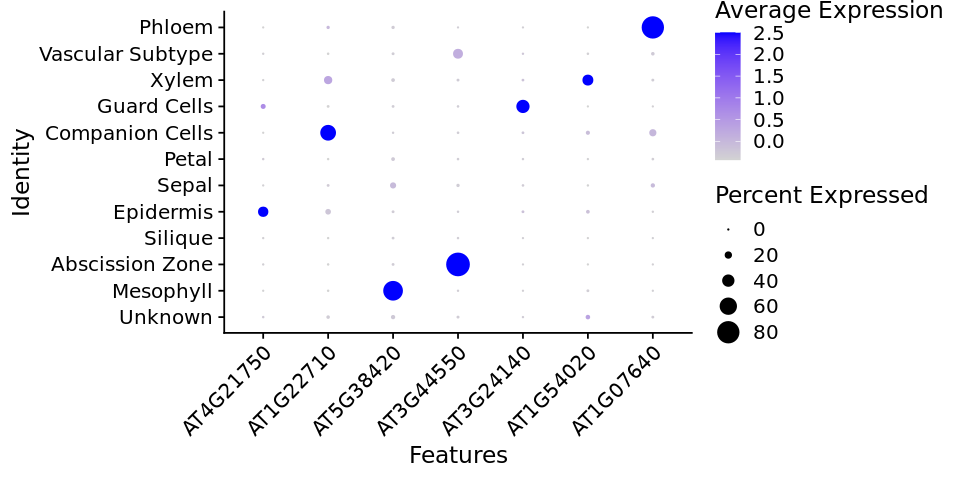

In [150]:
#works
DefaultAssay(seu_intd_wt) = "SCT"
seu_intd_wt@meta.data$consensus.anno[is.na(seu_intd_wt@meta.data$consensus.anno)] = "Unknown"
seu_intd_wt = SetIdent(seu_intd_wt,value = seu_intd_wt@meta.data$consensus.anno)
options(repr.plot.width=8, repr.plot.height=4)
DotPlot(seu_intd_wt, features = unique(single_markers$Locus)) + RotatedAxis()

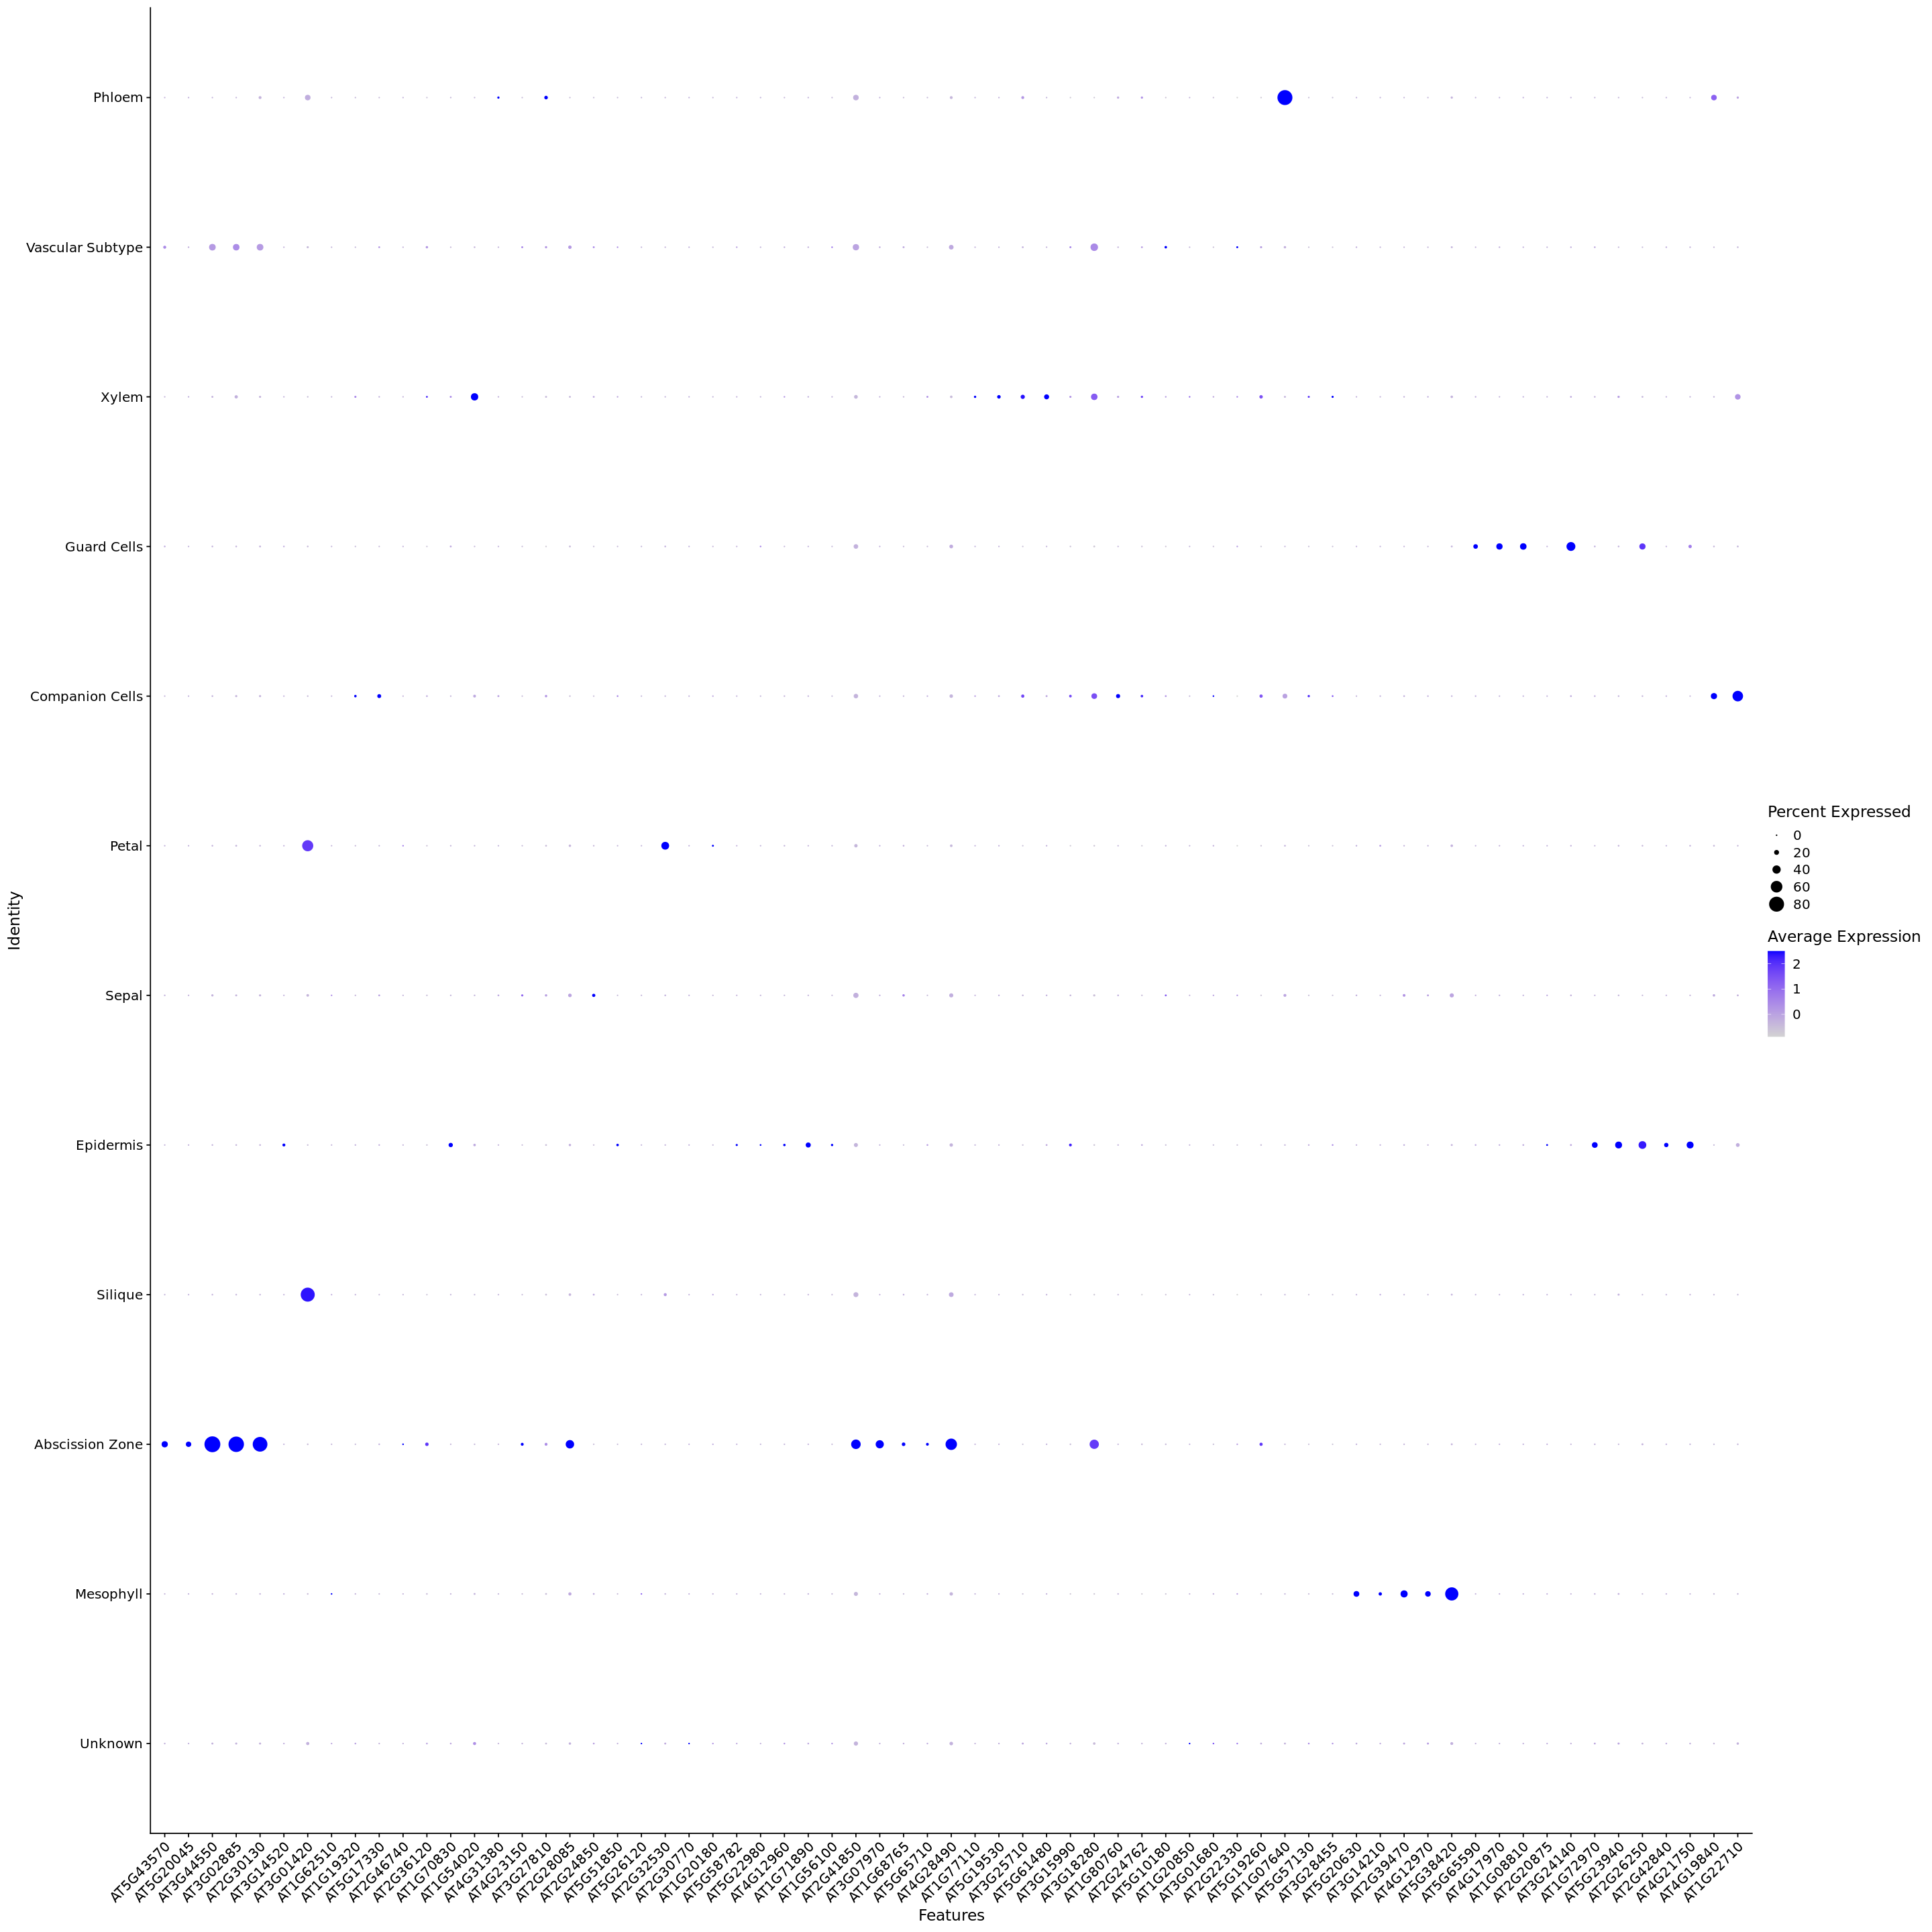

In [131]:
#works
DefaultAssay(seu_intd_wt) = "SCT"
seu_intd_wt@meta.data$consensus.anno[is.na(seu_intd_wt@meta.data$consensus.anno)] = "Unknown"
seu_intd_wt = SetIdent(seu_intd_wt,value = seu_intd_wt@meta.data$consensus.anno)
options(repr.plot.width=24, repr.plot.height=24)
DotPlot(seu_intd_wt, features =unique(known.good.markers$Locus)) + RotatedAxis()

In [115]:
unique(seu_intd_wt@meta.data$consensus.anno)

[1] "Unknown"          "Mesophyll"        "Abscission Zone"  "Silique"         
 [5] "Epidermis"        "Sepal"            "Petal"            "Companion Cells" 
 [9] "Guard Cells"      "Xylem"            "Vascular Subtype" "Phloem"

In [165]:
DefaultAssay(seu_intd_wt) = "SCT"
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_intd_wt, feature = "AT2G19050", pt.size = 2)

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: AT2G19050”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: AT2G19050”


ERROR: Error: None of the requested features were found: AT2G19050 in slot data
